In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from random import randint
from sklearn.preprocessing import StandardScaler

Напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [6]:
def linear_regression(k,x,b):
    
    return b + k * x 

In [7]:
x = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
b = np.array([0.5, 1.0])
k = 2
forecast = linear_regression(k,x,b)
print("Прогнози:", forecast)

Прогнози: [[ 2.5  5. ]
 [ 4.5  9. ]
 [ 6.5 13. ]
 [ 8.5 17. ]]


створіть функцію для обчислення функції втрат у векторному вигляді;

In [10]:
def compute_loss(forecast,fact):
    errors = forecast - fact
    return 1 / (2 * len(fact)) * np.sum((errors) ** 2)

fact = np.array([
    [2.5, 6.0],
    [4.8, 8.0],
    [9.5, 14.0],
    [8.5, 15.0]
])
loss = compute_loss(forecast, fact)


print("Функція втрат:", loss)

Функція втрат: 2.01125


реалізуйте один крок градієнтного спуску;

In [13]:
def gradient_descent_step(x, y, iter=1000, learning_rate=0.01, stopping_rate=0.01):
    slope = 0
    intercept = 0
    n = len(x)
    prev_mse = None

    for i in range(iter):
        y_pred = slope * x + intercept
        mse_result = compute_loss(y, y_pred)

        if prev_mse and abs(mse_result - prev_mse) <= stopping_rate:
            break
        prev_mse = mse_result

        slope_derivative = -(2/n) * np.sum(x * (y - y_pred))
        intercept_derivative = -(2/n) * np.sum(y - y_pred)

        slope = slope - slope_derivative * learning_rate
        intercept = intercept - intercept_derivative * learning_rate

    return slope, intercept



        

In [16]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 4, 5])
slope, intercept = gradient_descent_step(x, y)
print("Оновлені параметри:", slope, intercept)

Оновлені параметри: 1.1271978524705297 0.41429454500764884


знайдіть найкращі параметри 
𝑤
⃗
w
  для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [18]:
import pandas as pd


file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [20]:
X = housing_data[['area', 'bedrooms', 'bathrooms']].values
y = housing_data['price'].values


X = np.hstack((np.ones((X.shape[0], 1)), X))

In [21]:
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

In [26]:
def compute_loss(y, y_pred):
    errors = y_pred - y
    return 1 / (2 * len(y)) * np.sum(errors ** 2)

In [31]:
def gradient_descent_step(X, y, iter=1000, learning_rate=0.1, stopping_rate=0.01):
    weights = np.zeros(X.shape[1])
    n = len(y)
    prev_mse = None

    for i in range(iter):
        y_pred = np.dot(X, weights)
        mse_result = compute_loss(y, y_pred)

        if prev_mse and abs(mse_result - prev_mse) <= stopping_rate:
            break
        prev_mse = mse_result

        gradient = -(2/n) * np.dot(X.T, (y - y_pred))
        weights = weights - learning_rate * gradient

    return weights

weights = gradient_descent_step(X, y, iter=1000, learning_rate=0.1, stopping_rate=0.01)
print("Оновлені параметри:", weights)

Оновлені параметри: [4766729.24692962  821214.17390084  299983.7884718   695808.291632  ]


In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [33]:
y_pred = np.dot(X, weights)

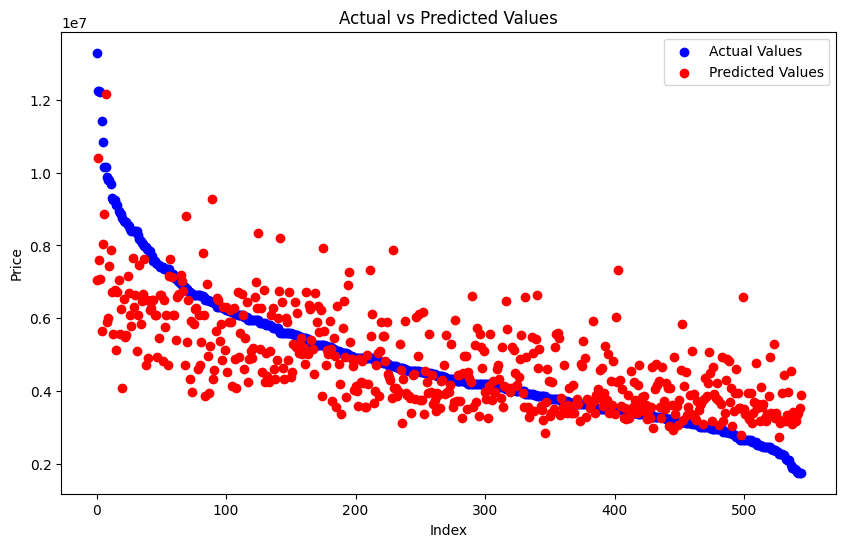

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.scatter(range(len(y)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

знайдіть ці ж параметри за допомогою аналітичного рішення;

In [35]:
X_transpose = X.T
weights_by_analytical_solution = np.linalg.inv(X_transpose @ X) @ X_transpose @ y


In [36]:
y_pred_analytical = X @ weights_by_analytical_solution

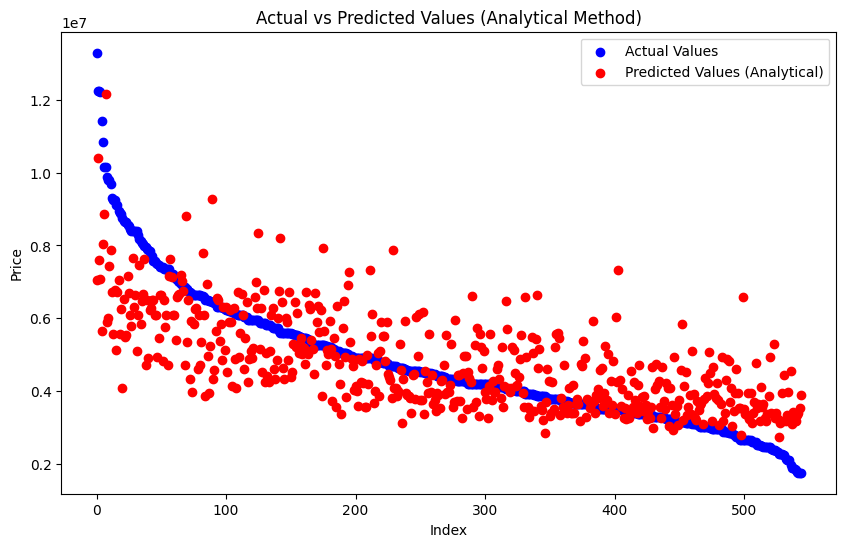

Weights by Analytical Solution: [4766729.24770642  821214.14349519  299983.57107963  695808.52272537]


In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.scatter(range(len(y)), y_pred_analytical, color='red', label='Predicted Values (Analytical)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values (Analytical Method)')
plt.legend()
plt.show()

print("Weights by Analytical Solution:", weights_by_analytical_solution)

для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати. 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred_sklearn = regressor.predict(X)

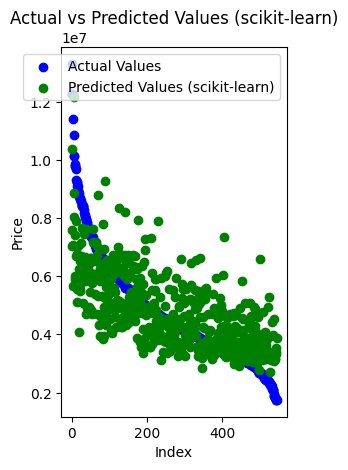

Weights by scikit-learn LinearRegression: [4766729.24770642       0.          821214.14349519  299983.57107963
  695808.52272537]


In [41]:
plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.scatter(range(len(y)), y_pred_sklearn, color='green', label='Predicted Values (scikit-learn)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values (scikit-learn)')
plt.legend()

plt.show()

print("Weights by scikit-learn LinearRegression:", np.hstack((regressor.intercept_, regressor.coef_)))